In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import pandas as pd
df = pd.read_csv('diabetes_.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df.shape)
print('======================================')
print(df.columns)
print('======================================')
df.info()

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

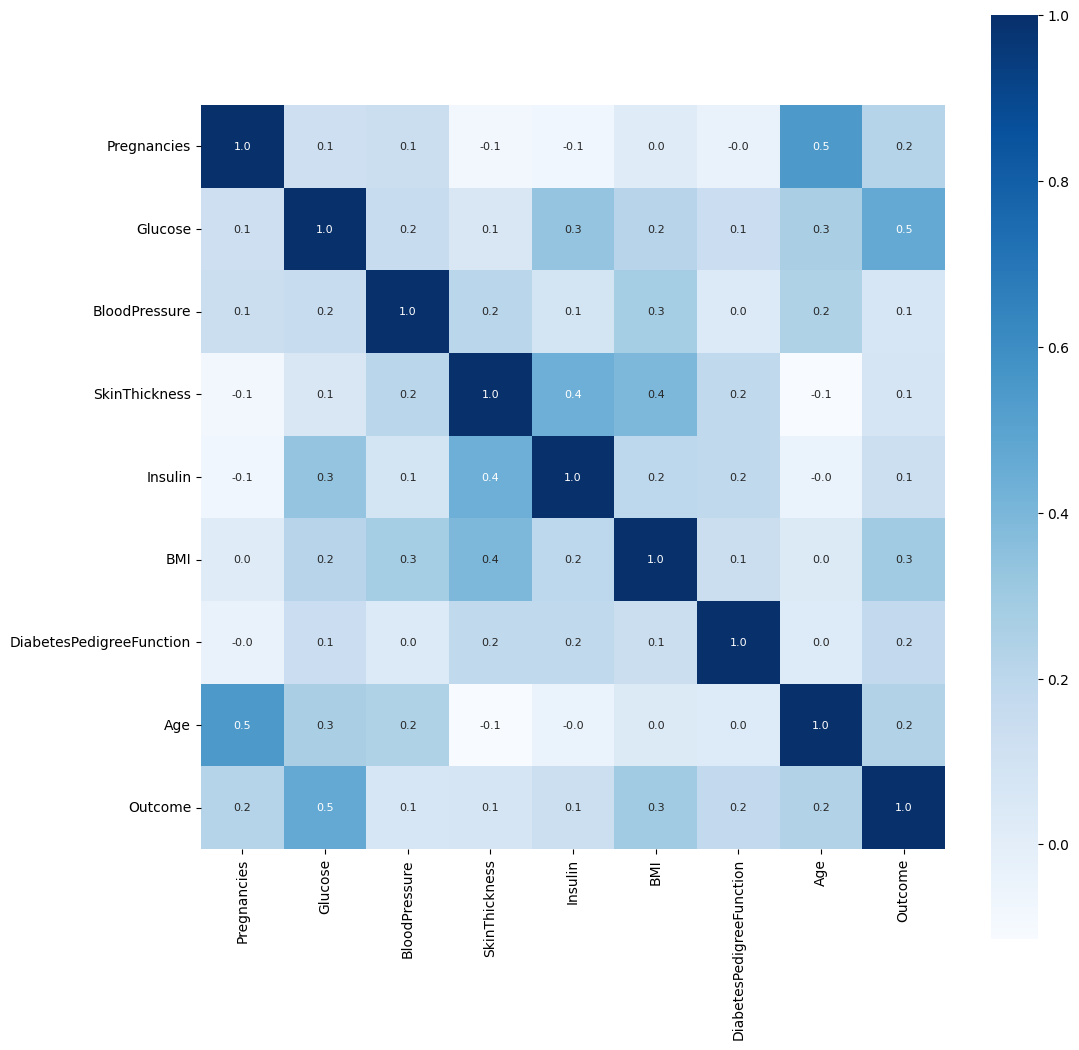

In [4]:
# Calculate correlation matrix
corr = df.corr()
# constructing a heatmap to nderstand the correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True,
            annot_kws={'size':8}, cmap='Blues')


In [5]:
df1 = df.astype(float)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [6]:
# Check duplicated values:
print('df duplicated values: ',df1.duplicated().sum())
print('======================================')
# Check missing values:
print('df missing values:\n',df1.isnull().sum())

df duplicated values:  0
df missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# Check the features with 0 value
zero_counts = df1.eq(0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [9]:
import numpy as np
# Replace 0 values in important features with median value
df1['Glucose'] = df1['Glucose'].replace(0, np.median(df1['Glucose']))
df1['BloodPressure'] = df1['BloodPressure'].replace(0, np.median(df1['BloodPressure']))
df1['SkinThickness'] = df1['SkinThickness'].replace(0, np.median(df1['SkinThickness']))
df1['Insulin'] = df1['Insulin'].replace(0, np.median(df1['Insulin']))
df1['BMI'] = df1['BMI'].replace(0, np.median(df1['BMI']))

In [10]:
# Split features and target
X = df1.drop('Outcome', axis=1)
y = df1['Outcome']

In [11]:
# Split train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
# Random Forest without scaling or resampling
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("\nRandom Forest - Original Data")
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
# Random Forest with scaling
rf_scaled = RandomForestClassifier(random_state=42)
rf_scaled.fit(X_train_scaled, y_train)
predictions_scaled = rf_scaled.predict(X_test_scaled)
print("\nRandom Forest - Scaled Data")
print("Classification Report:")
print(classification_report(y_test, predictions_scaled))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_scaled))


Random Forest - Original Data
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       107
         1.0       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154

Confusion Matrix:
[[93 14]
 [15 32]]

Random Forest - Scaled Data
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       107
         1.0       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154

Confusion Matrix:
[[93 14]
 [15 32]]


In [14]:
import pandas as pd
input_data = {
    "Pregnancies": 0,  # Modify based on relevant data for pregnancies
    "Glucose": 137,  # Use existing glucose level
    "BloodPressure": 40,  # Use existing blood pressure
    "SkinThickness": 35,  # Modify based on relevant data for skin thickness
    "Insulin": 168,  # Modify based on relevant data for insulin
    "BMI": 43.1,  # Use existing BMI
    "DiabetesPedigreeFunction": 2.288,  # Modify based on relevant data for diabetes pedigree function
    "Age": 33  # Use existing age
}
# Convert input data to a DataFrame
input_df = pd.DataFrame([input_data])
# Predict using the trained Random Forest model
predicted_outcome = rf.predict(input_df)

# Print the predicted outcome
print("Predicted Outcome for Diabetes:", predicted_outcome)
if predicted_outcome[0] == 1:
    print( "The model predicts a high risk of Diabetes.")
else:
    print("The model predicts a low risk of Diabetes.")

Predicted Outcome for Diabetes: [1.]
The model predicts a high risk of Diabetes.
